In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Student

In [36]:
# Read student dataset
student_df = pd.read_csv('data.csv', sep=";")
student_df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


## Preprocessing

In [37]:
# Check if any value is missing
student_df.isnull().values.any()

False

In [38]:
# Inspect the structure
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [39]:
# Check columns unique value
student_df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [40]:
# Drop unused columns
unused_col = ['Previous qualification (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
              'Previous qualification (grade)', 'Age at enrollment', 'Admission grade', "Father's occupation",
              "Mother's qualification", "Father's qualification", "Mother's occupation"]
student_df = student_df.drop(columns=unused_col)

In [41]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Displaced                                       4424 non-null   int64  
 8   Educational special needs                       4424 non-null   int64  
 9   Debtor                                   

In [42]:
# Target unique number
student_df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [43]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Displaced                                       4424 non-null   int64  
 8   Educational special needs                       4424 non-null   int64  
 9   Debtor                                   

## Classification

In [ ]:
# Get the data and labels 
data = student_df.drop(columns='Target')
labels = student_df['Target']

In [ ]:
labels.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
print(labels.shape, data.shape)

(4424,) (4424, 27)


In [47]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### Classification with KNN

In [48]:
# Model
model_knn = KNeighborsClassifier(n_neighbors=3)

In [49]:
# Fit
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
knn_predict = model_knn.predict(x_test)

In [51]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

     Dropout       0.68      0.65      0.66       316
    Enrolled       0.39      0.28      0.32       151
    Graduate       0.76      0.86      0.80       418

    accuracy                           0.68       885
   macro avg       0.61      0.60      0.60       885
weighted avg       0.67      0.68      0.67       885



### DecisionTree Classfication

In [52]:
# Model
model_dt = DecisionTreeClassifier(random_state=0)

In [53]:
# Fit
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [54]:
# Predict
dt_predict = model_dt.predict(x_test)

In [55]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

     Dropout       0.72      0.69      0.71       316
    Enrolled       0.38      0.38      0.38       151
    Graduate       0.78      0.81      0.79       418

    accuracy                           0.69       885
   macro avg       0.63      0.63      0.63       885
weighted avg       0.69      0.69      0.69       885



## Confusion Matrix

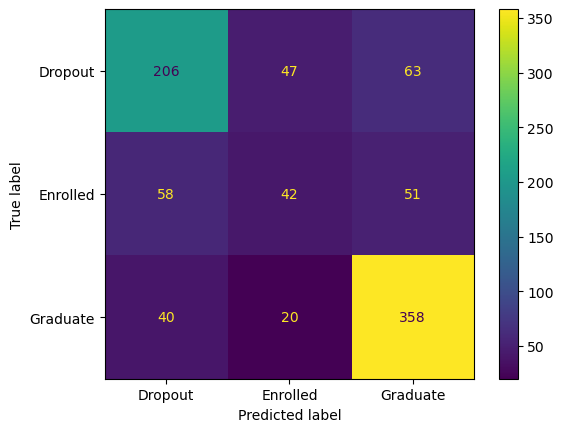

In [56]:
# KNN Confusion Matrix
cm = confusion_matrix(y_test, knn_predict, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.show()

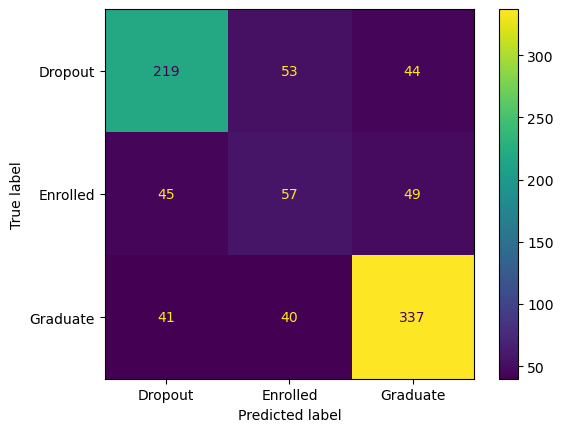

In [57]:
# DecisionTree Confusion Matrix
cm = confusion_matrix(y_test, dt_predict, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot()
plt.show()